# Assignment 1. Data Acquisition

## Introduction

In this assignment, we ask you to write python code to solve three data acquisition problems. You will learn how to load CSV files, create functions in python, create plots and summary statistics, and scrape web page. 

### Data

For this homework, you will use three datasets.
1. NOAA Hanover Climate Data: https://www.ncdc.noaa.gov/cdo-web/
2. S&P 500, Dow Jones Industrial Average, Nasdaq Composite
3. [Rotten Tomatoes Weekend Box Office Chart](https://www.rottentomatoes.com/browse/box-office/)

### Useful libraries

- pandas
- matplotlib
- numpy
- [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/)
- [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

### References

Chapter 2, 3, and 9 in Data Science from Scratch.


# Problem 1 Hanover Climate Data

## Q1 Load the CSV file.

The data file is [NOAA_Hanover.csv](https://drive.google.com/file/d/1JX7HLX8B8qgEJ4q19qEg6VuMeQe4OS8H/view?usp=sharing). write a function to load the file to pandas dataframe and return the dataframe.

Note:
- The data type of the "DATE" column should be datetime or Timestamp.
- Rows should be sorted by "DATE".

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
drive.CreateFile({'id': '1JX7HLX8B8qgEJ4q19qEg6VuMeQe4OS8H'}).GetContentFile('NOAA_Hanover.csv')
def readAndReturn():
  data = pd.read_csv("NOAA_Hanover.csv")
  return data


## Q2 Show the data (15 point)

Write python code in the following cell to:
- Print out all column names.
- Show the first 10 rows of the dataframe.
- Show the date range of the data.
- Print out the percentage of missing values for columns "TMIN", "TMAX", and "PRCP"?
- Find min, median, max, mean, and std of "TMIN", "TMAX", and "PRCP".

In [7]:
hanover_data = pd.read_csv('NOAA_Hanover.csv')

# write your code in here
for col in hanover_data.columns: 
    print(col) 

rows = hanover_data.head(10)
print(rows)

dates = pd.date_range(start ='1-11-1884', end ='2-28-2018', periods =2) 
print('Date Range:', dates)
cols = [6,12,14]
colsData = hanover_data[hanover_data.columns[cols]]


percent_missing = colsData.isnull().sum() * 100 / len(hanover_data)
print(percent_missing)

colsData.describe()

STATION
NAME
LATITUDE
LONGITUDE
ELEVATION
DATE
PRCP
PRCP_ATTRIBUTES
SNOW
SNOW_ATTRIBUTES
SNWD
SNWD_ATTRIBUTES
TMAX
TMAX_ATTRIBUTES
TMIN
TMIN_ATTRIBUTES
TOBS
TOBS_ATTRIBUTES
WT01
WT01_ATTRIBUTES
WT03
WT03_ATTRIBUTES
WT04
WT04_ATTRIBUTES
WT05
WT05_ATTRIBUTES
WT06
WT06_ATTRIBUTES
WT07
WT07_ATTRIBUTES
WT08
WT08_ATTRIBUTES
WT09
WT09_ATTRIBUTES
WT11
WT11_ATTRIBUTES
WT14
WT14_ATTRIBUTES
WT16
WT16_ATTRIBUTES
WT18
WT18_ATTRIBUTES
       STATION              NAME  ...  WT18  WT18_ATTRIBUTES
0  USC00273855  HANOVER 2, NH US  ...   NaN              NaN
1  USC00273855  HANOVER 2, NH US  ...   NaN              NaN
2  USC00273855  HANOVER 2, NH US  ...   NaN              NaN
3  USC00273855  HANOVER 2, NH US  ...   NaN              NaN
4  USC00273855  HANOVER 2, NH US  ...   NaN              NaN
5  USC00273855  HANOVER 2, NH US  ...   NaN              NaN
6  USC00273855  HANOVER 2, NH US  ...   NaN              NaN
7  USC00273855  HANOVER 2, NH US  ...   NaN              NaN
8  USC00273855  HANOVER 2,

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (27,29,31,33,37,39,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PRCP,TMAX,TMIN
count,46259.000000,44974.000000,45043.000000
mean,2.678177,13.349449,1.216533
std,6.764733,11.756245,10.987059
min,0.000000,-24.400000,-40.000000
25%,0.000000,3.300000,-5.600000
50%,0.000000,13.900000,1.700000
75%,1.500000,23.900000,10.000000
max,143.500000,39.400000,25.000000


# Problem 2 Finance

Before you start working on this problem, install pandas-datareader python library.

You will implement code to download DJIA, S&P 500, and NASDAQ from FRED (Federal Reserve Economic Data) and visualize the data from 2010-01-01 to 2020-01-01.

## Q1 Download the data (10 points)

Read pandas-datareader document at https://pydata.github.io/pandas-datareader/stable/remote_data.html#remote-data-fred to figure out how to use the API to download the data. Write your code to download the data.

In [ ]:
# implement your code to load DJIA, SP500, NASDAQCOM from fred
import pandas_datareader.data as remote
import datetime as dt

start = dt.datetime(2010, 1, 1)
end = dt.datetime(2020, 1, 1)

fred = remote.DataReader(['DJIA', 'SP500', 'NASDAQCOM'], 'fred', start, end)
fred.head(10)

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


,DJIA,SP500,NASDAQCOM
DATE,,,
2010-01-01,NaN,NaN,NaN
2010-01-04,NaN,NaN,2308.42
2010-01-05,NaN,NaN,2308.71
2010-01-06,NaN,NaN,2301.09
2010-01-07,NaN,NaN,2300.05
2010-01-08,NaN,NaN,2317.17
2010-01-11,NaN,NaN,2312.41
2010-01-12,NaN,NaN,2282.31
2010-01-13,NaN,NaN,2307.90


,DJIA,SP500,NASDAQCOM
DATE,,,
2008-03-27,NaN,NaN,2280.83
2008-03-28,NaN,NaN,2261.18
2008-03-31,NaN,1322.70,2279.10
2008-04-01,NaN,1370.18,2362.75
2008-04-02,12605.83,1367.53,2361.40
2008-04-03,12626.03,1369.31,2363.30
2008-04-04,12609.42,1370.40,2370.98
2008-04-07,12612.43,1372.54,2364.83
2008-04-08,12576.44,1365.54,2348.76


## Q2 Plot the data (15 points)

Make three line plots to show how Dow Jones Industrial Average, S&P 500, and NASDAQ change over time.

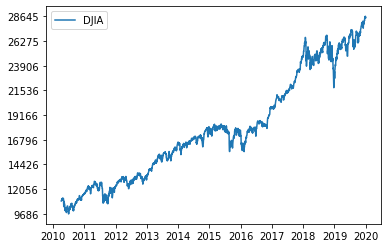

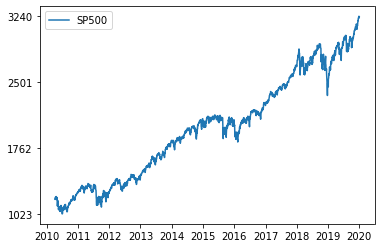

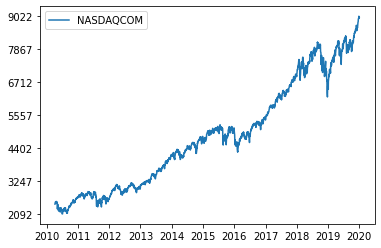

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as remote
import datetime as dt

start = dt.datetime(2010, 1, 1)
end = dt.datetime(2020, 1, 1)

#edit the line from last cell so NaN values are dropped
fred = remote.DataReader(['DJIA', 'SP500', 'NASDAQCOM'], 'fred', start, end).dropna(subset=['DJIA', 'SP500', 'NASDAQCOM'])
#index datetime so we can use it as our x axis
fred.index = pd.to_datetime(fred.index)

#DJIA graph
plt.plot(fred.index, fred['DJIA'], label='DJIA')
plt.legend(loc='upper left')
#plt.yscale(min=9000, max=29000) missing 'value', steps are unclean
yticks = np.linspace(fred['DJIA'].min(), fred['DJIA'].max(), 9)
plt.yticks(yticks)              
plt.show() 

#SP500 graph
plt.plot(fred.index, fred['SP500'], label='SP500')
plt.legend(loc='upper left')
#plt.yscale(min=0, max=3500) missing 'value', steps are unclean
yticks = np.linspace(fred['SP500'].min(), fred['SP500'].max(), 4)
plt.yticks(yticks)              
plt.show() 

#NASDAQCOM graph
plt.plot(fred.index, fred['NASDAQCOM'], label='NASDAQCOM')
plt.legend(loc='upper left')
#plt.yscale(min=0, max=10000) missing 'value', steps are unclean
yticks = np.linspace(fred['NASDAQCOM'].min(), fred['NASDAQCOM'].max(), 7)
plt.yticks(yticks)              
plt.show() 

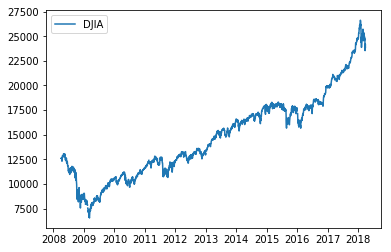

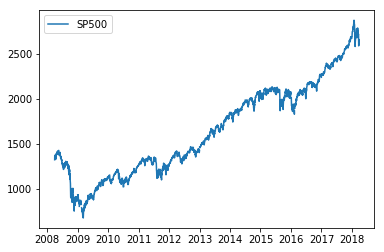

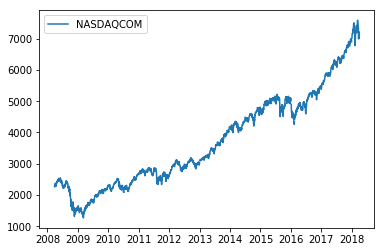

## Q3 Correlation (15 points)

The three composite indices look similar. Compute correlations to quantify how similar they are. 

Hint: how do you handle missing values (i.e., nan)?

In [ ]:
from scipy import stats

# stats.pearsonr gives us a tuple(r, p).
DJSP = stats.pearsonr(fred['DJIA'], fred['SP500'])
DJND = stats.pearsonr(fred['DJIA'], fred['NASDAQCOM'])
NDSP = stats.pearsonr(fred['NASDAQCOM'], fred['SP500'])

# we call the r and p values
print('DJIA with SP500: R={}, p={}'.format(DJSP[0], DJSP[1]))
print('DJIA with NASDAQCOM: R={}, p={}'.format(DJND[0], DJND[1]))
print('NASDAQCOM with SP500: R={}, p={}'.format(NDSP[0], NDSP[1]))

# .dropna() was used in an earlier cell to update the data by removing missing values.
# Therefore the calculation had no error as it was done with no NaN values

DJIA with SP500: R=0.993170554799352, p=0.0
DJIA with NASDAQCOM: R=0.9951328108053659, p=0.0
NASDAQCOM with SP500: R=0.9946520041727748, p=0.0


DJIA with SP500: R=0.9939128687777764, p=0.0
DJIA with NASDAQCOM: R=0.9907017939356934, p=0.0
NASDAQCOM with SP500: R=0.9931503389927757, p=0.0


# Problem 3 Weekend Box Office Chart (30 points)

Write code to download the weekend box office chart from [Rotten Tomatoes](https://www.rottentomatoes.com/browse/box-office/), parse the web page, load the chart to pandas dataframe, and print out the chart.

In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd


url = "https://www.rottentomatoes.com/browse/box-office/"

with urlopen(url) as homepage:
    soup = BeautifulSoup(homepage.read(), 'html.parser')

    # first we use the find method to retrieve the table with 'center-table' id
    table = soup.find('table', {'class': 'center table'})
 
    # then we iterate over each row and extract movies information
    table_headings = table.find_all('th')
    headings = []
    for tr in table_headings:
        td = tr.find_all('a')
        row = [tr.text for tr in td]
        if row:
          headings.append(row)

    print(headings)

    table_items = table.find_all('tr')

    items = []
    for tr in table_items:
        td = tr.find_all('td')
        row = [tr.text for tr in td]
        if row:
          items.append(row)

    print(items)

    # unable to get into the nested tags, unable to debug either...


    
    

[['THIS WEEK'], ['LAST WEEK'], ['T-METER'], ['TITLE'], ['WEEKS RELEASED'], ['WEEKEND GROSS'], ['TOTAL GROSS'], ['THEATER AVERAGE'], ['# OF THEATERS']]
[['1', '--', '  78%  ']]


,THIS WEEK,LAST WEEK,T-METER,TITLE,WEEKS RELEASED,WEEKEND GROSS,TOTAL GROSS,THEATER AVERAGE,# OF THEATERS
0,1,--,96%,A Quiet Place,1,$50.2M,$50.2M,--,--
1,2,1,74%,Ready Player One,2,$24.6M,$24.6M,--,--
2,3,--,83%,Blockers,1,$20.6M,$20.6M,--,--
3,4,3,97%,Black Panther,8,$8.7M,$501.1M,--,--
4,5,2,25%,Tyler Perry's Acrimony,2,$8.4M,$8.4M,--,--
5,6,4,70%,I Can Only Imagine,4,$7.8M,$7.8M,--,--
6,7,--,78%,Chappaquiddick,1,$5.8M,$5.8M,--,--
7,8,6,18%,Sherlock Gnomes,3,$5.4M,$5.4M,--,--
8,9,5,45%,Pacific Rim Uprising,3,$4.8M,$4.8M,--,--
9,10,11,92%,Isle of Dogs,--,$4.6M,$4.6M,--,--
